In [1]:
import matplotlib.pyplot as plt

# Imort hydrodynamic code
from hydro_adi_classic import *
from hydro_adi_riemann import *

In [2]:
# Set up matrix

gamma = 7.0/5.0

initial = np.zeros((3, 200))
initial[0,:100] = 10**5
initial[0, 100:] = 1.24*10**4
initial[2, :100] = 1.0/(gamma - 1)
initial[2, 100:] = 0.1/(gamma - 1)

numberSteps = 5000

In [3]:
# Run classical method
classic = initial.copy()

for _ in range(numberSteps):
    classic = hydro_adi_classic_one_timestep(classic, 1.0, 1.0)
    

In [4]:
# Run riemann method
riemann = initial.copy()

for _ in range(numberSteps):
    riemann = hydro_adi_riemann_one_timestep(riemann, 1.0, 1.0)

In [5]:
# Plots to compare the classical and the riemann result

def createPlot(classic, riemann, scale=1.0):
    
    fig, axs = plt.subplots(2, 3, figsize=(12,8))

    N = len(classic[0,:])
    bound = N/scale/2.0
    
    axs[0][0].plot(np.linspace(-bound, bound, N), classic[0,:])
    axs[0][1].plot(np.linspace(-bound, bound, N), classic[1,:]/classic[0,:])
    axs[0][2].plot(np.linspace(-bound, bound, N), classic[2,:]/classic[0,:])
    axs[0][0].set_xlabel("Distance x")
    axs[0][1].set_xlabel("Distance x")
    axs[0][2].set_xlabel("Distance x")
    axs[0][0].set_ylabel("Density")
    axs[0][1].set_ylabel("Velocity")
    axs[0][2].set_ylabel("Specific Energy")

    axs[1][0].plot(np.linspace(-bound, bound, N), riemann[0,:])
    axs[1][1].plot(np.linspace(-bound, bound, N), riemann[1,:]/riemann[0,:])
    axs[1][2].plot(np.linspace(-bound, bound, N), riemann[2,:]/riemann[0,:])
    axs[1][0].set_xlabel("Distance x")
    axs[1][1].set_xlabel("Distance x")
    axs[1][2].set_xlabel("Distance x")
    axs[1][0].set_ylabel("Density")
    axs[1][1].set_ylabel("Velocity")
    axs[1][2].set_ylabel("Specific Energy")
    plt.tight_layout()


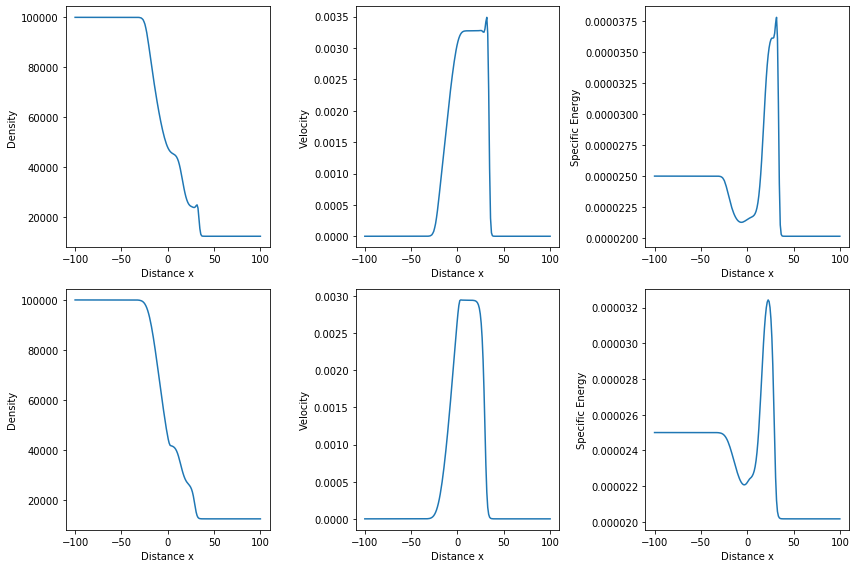

In [6]:
createPlot(classic, riemann, 1.0)

The plots above show that the general behavior of the properties is the same for both methods but the results obtained by the riemann solver are smoother.

### 10x higher spatial resolution

In [7]:
# Set up matrix

gamma = 7.0/5.0

initial = np.zeros((3, 2000))
initial[0,:1000] = 10**5
initial[0, 1000:] = 1.24*10**4
initial[2, :1000] = 1.0/(gamma - 1)
initial[2, 1000:] = 0.1/(gamma - 1)

numberSteps = 5000

In [8]:
# Run classical method
classic = initial.copy()

for _ in range(numberSteps):
    classic = hydro_adi_classic_one_timestep(classic, 0.1, 1.0)
    

In [9]:
# Run riemann method
riemann = initial.copy()

for _ in range(numberSteps):
    riemann = hydro_adi_riemann_one_timestep(riemann, 0.1, 1.0)

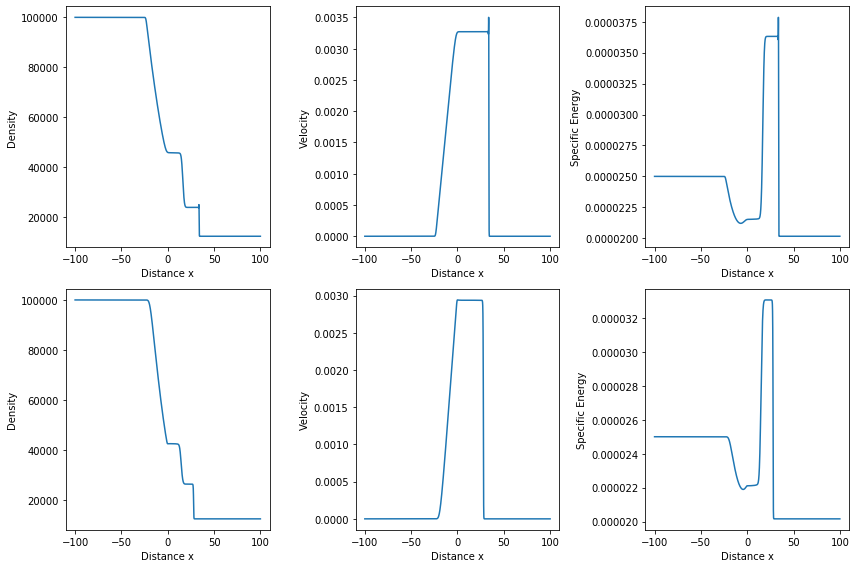

In [10]:
createPlot(classic, riemann, 10.0)

Shock wave (head wave): sudden compression of the fluid takes place at the head of the pressure wave. In the lower, middle graph the position of the shock can be indentified at the discontinuity of the velocity (x=30).  
Contact discontinuity: sudden drop of specific energy due to heat generation (production of entropy). In the lower, right graph the contact wave can be identified at the discontinuity of the specific energy (x=15).  
Expansion wave (Rarefaction wave): A collection of expansion waves is present in the region between x = [-20, 15] and builds a rarefactiom fan. The expansion causes a drop of the specific energy as seen in the lower, right plot.